# Imports

In [1]:
!pip install praw
!pip install tweepy
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, RegexpTokenizer
import praw
from nltk.corpus import stopwords
import datetime as dt
import tweepy as tw
sns.set(style='darkgrid', context='talk', palette='Dark2')

# Authentication for Reddit and Twitter

In [2]:
reddit = praw.Reddit(client_id='dLOmoEMZ11bubOFV7JN2vg',
                     client_secret='JZIXCcoeVNsYlMuZuy535rSV5raktQ',
                     user_agent='sentim')
consumer_key = 's0f6LpdtXH0FKT8yj3wWRdfa5'
consumer_secret = 'dn8Tglj73GG5wQnXt6dHCM5HeUEnrHXgXWhCQvSKsjU9sfmpqd'
access_token = '836984143846195200-imFz64hA0m5uNmwucai3zqW5glMVnqb'
access_token_secret = 'VhaTdamzhlYD9QmxgCW3RFRo5yWaXKXBwphcdofwBmuC8'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
search_words = "#"

# Gathering Resources

In [4]:
headlines = set()
topic=input('What do you want information about?')
search_words=search_words+topic
for submission in reddit.subreddit(topic).hot(limit=500):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

499


In [5]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en").items(500)

In [6]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bshre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bshre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
sia = SIA()
results = []
resultstw = []

In [8]:
topics_dict = { "title":[],"score":[],"id":[],"url":[],"comms_num": [],"created": [],"body":[]}

In [9]:
for submission in reddit.subreddit(topic).hot(limit=800):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

In [10]:
topics_data = pd.DataFrame(topics_dict)
topics_data

,title,score,id,url,comms_num,created,body
0,My Redmi Note 8 Pro got Miui update few days a...,30,p2ubz8,https://www.reddit.com/r/Xiaomi/comments/p2ubz...,19,1.628750e+09,
1,Is that same?,3,p2v36d,https://www.reddit.com/r/Xiaomi/comments/p2v36...,2,1.628754e+09,Is a case for xiaomi redmi note 9 compatible w...
2,Major issues after update,10,p2qgke,https://www.reddit.com/r/Xiaomi/comments/p2qgk...,8,1.628730e+09,I receieved a notification that an update was ...
3,You can use Mi Video app to watch ad free YouT...,197,p28nlr,https://www.reddit.com/r/Xiaomi/comments/p28nl...,73,1.628669e+09,I just recently found out about this and its b...
4,Recent apps animation doesn't work at all on 3...,11,p2ojzw,https://v.redd.it/24a44qif9tg71,7,1.628723e+09,
5,Will more devices get miui enhanced edition?,3,p2ssvd,https://www.reddit.com/r/Xiaomi/comments/p2ssv...,1,1.628743e+09,"Only 12 are getting it? Will there be more, it..."
6,Play Store issue in Xiaomi.eu,2,p2u070,https://www.reddit.com/r/Xiaomi/comments/p2u07...,0,1.628749e+09,"Hi, guys due to some reason every time I reboo..."
7,"What does this ""Clock"" thing in game turbo do?...",1,p2w5f0,https://v.redd.it/j4hkbvz88wg71,1,1.628759e+09,
8,"Xiaomi Mi 11 lite 5G, ARcore and Depth API",1,p2w1rw,https://www.reddit.com/r/Xiaomi/comments/p2w1r...,0,1.628759e+09,Hello everybody! I'm looking for a phone to us...
9,Every day is a new adventure with my new Redmi...,25,p2fcyh,https://www.reddit.com/r/Xiaomi/comments/p2fcy...,28,1.628696e+09,I got this phone few weeks ago. Soon as I turn...


# Polarity

In [11]:
for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:5], width=150)

[{'compound': 0.0, 'headline': "Can't cast to MItv 4a", 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.4019,
  'headline': "Recent apps animation doesn't work at all on 3rd party launcher. Any Fix? (Poco X3, MIUI 12.5/Android11)",
  'neg': 0.0,
  'neu': 0.856,
  'pos': 0.144},
 {'compound': 0.0, 'headline': 'How to make the bottom navigation bar transparent again?', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.296, 'headline': 'Redmi Note 9 Pro no boot after automatic update', 'neg': 0.239, 'neu': 0.761, 'pos': 0.0},
 {'compound': 0.0, 'headline': 'Redmi 9t or Redmi Note 9', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


In [12]:
for tweet in tweets:
    pol_scoretw = sia.polarity_scores(tweet.text)
    pol_scoretw['tweet_content'] = tweet.text
    resultstw.append(pol_scoretw)

pprint(resultstw[:5], width=150)

[{'compound': 0.3612,
  'neg': 0.0,
  'neu': 0.839,
  'pos': 0.161,
  'tweet_content': '@XiaomiIndia I like the feature most is 50W fast charging.\n#MiPowerbank50W\n\n#FastFowardCharging \nI ♥️ #Mi #Xiaomi'},
 {'compound': -0.6808,
  'neg': 0.268,
  'neu': 0.732,
  'pos': 0.0,
  'tweet_content': '@dylanphair__ Instead of that, still.. Again\n'
                   '#Samsung at No. 1, 2 &amp; 4\n'
                   'But #Apple at No. 5, while \n'
                   'No. 3 at #Xiaomi… https://t.co/RcMi6ZxCka'},
 {'compound': 0.5994,
  'neg': 0.0,
  'neu': 0.822,
  'pos': 0.178,
  'tweet_content': '@XiaomiIndia My favourite feature of this PowerBank which i loved most is that "It gives fast charging as-well-as l… '
                   'https://t.co/TPbCYryHVk'},
 {'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'tweet_content': 'RT @manukumarjain: 6️⃣ years of #MadeInIndia. 😍\n'
                   '\n'
                   "We have been one of the biggest adopters of the Hon #Pri

In [13]:
df = pd.DataFrame.from_records(results)
pprint(df.head())

   compound                                           headline    neg    neu  \
0    0.0000                              Can't cast to MItv 4a  0.000  1.000   
1    0.4019  Recent apps animation doesn't work at all on 3...  0.000  0.856   
2    0.0000  How to make the bottom navigation bar transpar...  0.000  1.000   
3   -0.2960    Redmi Note 9 Pro no boot after automatic update  0.239  0.761   
4    0.0000                           Redmi 9t or Redmi Note 9  0.000  1.000   

     pos  
0  0.000  
1  0.144  
2  0.000  
3  0.000  
4  0.000  


In [14]:
dftw = pd.DataFrame.from_records(resultstw)
pprint(dftw.head())

   compound    neg    neu    pos  \
0    0.3612  0.000  0.839  0.161   
1   -0.6808  0.268  0.732  0.000   
2    0.5994  0.000  0.822  0.178   
3    0.0000  0.000  1.000  0.000   
4    0.0000  0.000  1.000  0.000   

                                       tweet_content  
0  @XiaomiIndia I like the feature most is 50W fa...  
1  @dylanphair__ Instead of that, still.. Again\n...  
2  @XiaomiIndia My favourite feature of this Powe...  
3  RT @manukumarjain: 6️⃣ years of #MadeInIndia. ...  
4  RT @manukumarjain: 6️⃣ years of #MadeInIndia. ...  


# Classification

In [15]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
pprint(df.head(), width=200)

   compound                                           headline    neg    neu  \
0    0.0000                              Can't cast to MItv 4a  0.000  1.000   
1    0.4019  Recent apps animation doesn't work at all on 3...  0.000  0.856   
2    0.0000  How to make the bottom navigation bar transpar...  0.000  1.000   
3   -0.2960    Redmi Note 9 Pro no boot after automatic update  0.239  0.761   
4    0.0000                           Redmi 9t or Redmi Note 9  0.000  1.000   

     pos  label  
0  0.000      0  
1  0.144      1  
2  0.000      0  
3  0.000     -1  
4  0.000      0  


In [16]:
dftw['label'] = 0
dftw.loc[dftw['compound'] > 0.2, 'label'] = 1
dftw.loc[dftw['compound'] < -0.2, 'label'] = -1
pprint(dftw.head(), width=200)

   compound    neg    neu    pos  \
0    0.3612  0.000  0.839  0.161   
1   -0.6808  0.268  0.732  0.000   
2    0.5994  0.000  0.822  0.178   
3    0.0000  0.000  1.000  0.000   
4    0.0000  0.000  1.000  0.000   

                                       tweet_content  label  
0  @XiaomiIndia I like the feature most is 50W fa...      1  
1  @dylanphair__ Instead of that, still.. Again\n...     -1  
2  @XiaomiIndia My favourite feature of this Powe...      1  
3  RT @manukumarjain: 6️⃣ years of #MadeInIndia. ...      0  
4  RT @manukumarjain: 6️⃣ years of #MadeInIndia. ...      0  


In [17]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].pos)[:5], width=200)
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].neg)[:5], width=200)
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=True)

Positive headlines:

[0.144, 0.095, 0.219, 0.079, 0.13]
["Recent apps animation doesn't work at all on 3rd party launcher. Any Fix? (Poco X3, MIUI 12.5/Android11)",
 'Why cant I find the home bar when using full screen gestures. Checked full screen display and nothing. It appears when searches but nothing when I clicked on it. Fix please?',
 'Mi True Wireless Earbuds Basic 2 right earbud not working or charging',
 "Okay. Now. How do I split screen two apps, if holding the app doesn't give me any options. This is the 12.5 Miui update.",
 'wait my redmi note 9 pro support 5g ? it show up as 5g or 5g+ when im using internet data']

Negative headlines:

[0.239, 0.102, 0.293, 0.286, 0.13]
['Redmi Note 9 Pro no boot after automatic update',
 "Anyone know how to stop this? I'm trying to use a sound system at work for one of my classes. I can't connect because it keeps doing this?!",
 'Stop making the Redmi series more expensive!',
 'Did Miui 12.5 messed up Third-Party Launchers?',
 "Issue wit

In [18]:
print("Positive tweets:\n")
pprint(list(dftw[dftw['label'] == 1].pos)[:5], width=200)
pprint(list(dftw[dftw['label'] == 1].tweet_content)[:5], width=200)

print("\nNegative tweets:\n")
pprint(list(dftw[dftw['label'] == -1].neg)[:5], width=200)
pprint(list(dftw[dftw['label'] == -1].tweet_content)[:5], width=200)

df2tw = dftw[['tweet_content', 'label']]
df2tw.to_csv('tweet_content.csv', mode='a', encoding='utf-8', index=True)

Positive tweets:

[0.161, 0.178, 0.288, 0.135, 0.135]
['@XiaomiIndia I like the feature most is 50W fast charging.\n#MiPowerbank50W\n\n#FastFowardCharging \nI ♥️ #Mi #Xiaomi',
 '@XiaomiIndia My favourite feature of this PowerBank which i loved most is that "It gives fast charging as-well-as l… https://t.co/TPbCYryHVk',
 '@XiaomiIndia The Powerbank Is The Only one Which Comes  With Amazing Super Powers 🤩🤩\n My Favourite Feature Is .. Th… https://t.co/ZqAQX8mEsp',
 'I like the feature most is 50W fast charging.\nIt can charge a laptop with 45W.\n#MiPowerbank50W\n\n#FastFowardCharging… https://t.co/qF1k5vuCp3',
 '@XiaomiIndia I like the feature most is 50W fast charging.\nIt can charge a laptop with 45W.\n#MiPowerbank50W… https://t.co/4T7zkXbOpS']

Negative tweets:

[0.268, 0.216, 0.099, 0.285, 0.461]
['@dylanphair__ Instead of that, still.. Again\n#Samsung at No. 1, 2 &amp; 4\nBut #Apple at No. 5, while \nNo. 3 at #Xiaomi… https://t.co/RcMi6ZxCka',
 'Battery anxiety! A modern problem. No

In [19]:
print(df.label.value_counts())
counts = df.label.value_counts(normalize=True) * 100
print(counts)

 0    322
-1     89
 1     88
Name: label, dtype: int64
 0    64.529058
-1    17.835671
 1    17.635271
Name: label, dtype: float64


In [20]:
print(dftw.label.value_counts())
countstw = dftw.label.value_counts(normalize=True) * 100
print(countstw)

 1    276
 0    214
-1     10
Name: label, dtype: int64
 1    55.2
 0    42.8
-1     2.0
Name: label, dtype: float64


# Reddit Figures

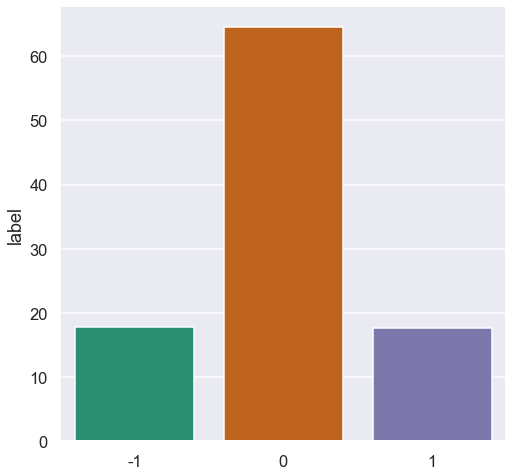

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

sns.barplot(x=counts.index, y=counts, ax=ax)
plt.show()

# Twitter Figures

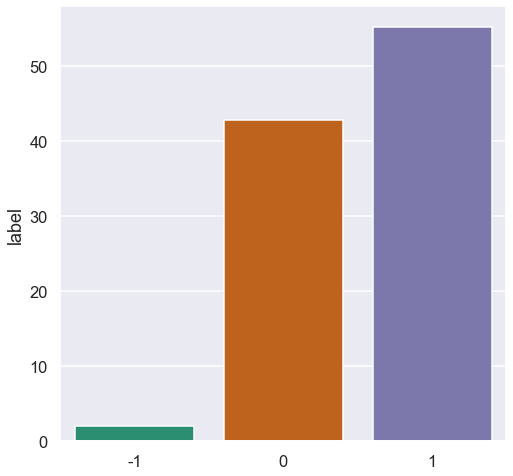

In [22]:
figtw, axtw = plt.subplots(figsize=(8, 8))

axtw.set_xticklabels(['Negative', 'Neutral', 'Positive'])
axtw.set_ylabel("Percentage")

sns.barplot(x=countstw.index, y=countstw, ax=axtw)
plt.show()

In [23]:
tokenizer = RegexpTokenizer(r'\w+')

In [24]:
stop_words = stopwords.words('english')

# Processing

In [25]:
def process_text(headlines):
    tokens1 = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens1.extend(toks)
    return tokens1
def process_texttw(tweets):
    tokens1tw = []
    for tweet in tweets:
        tokstw = tokenizer.tokenize(tweet)
        tokstw = [t.lower() for t in tokstw if t.lower() not in stop_words]
        tokens1tw.extend(tokstw)
    return tokens1tw

# Frequent 20

In [26]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
#print(pos_tokens)
pos_freq = nltk.FreqDist(pos_tokens)

posfreq20=pos_freq.most_common(20)
p20=[w[0] for w in posfreq20]

In [27]:
pos_linestw = list(dftw[dftw.label == 1].tweet_content)

pos_tokenstw = process_texttw(pos_linestw)
#print(pos_tokens)
pos_freqtw = nltk.FreqDist(pos_tokenstw)

posfreq20tw=pos_freqtw.most_common(20)
p20tw=[w[0] for w in posfreq20tw]

# Word Cloud

In [28]:
!pip install wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

# Reddit Wordcloud (Positive)

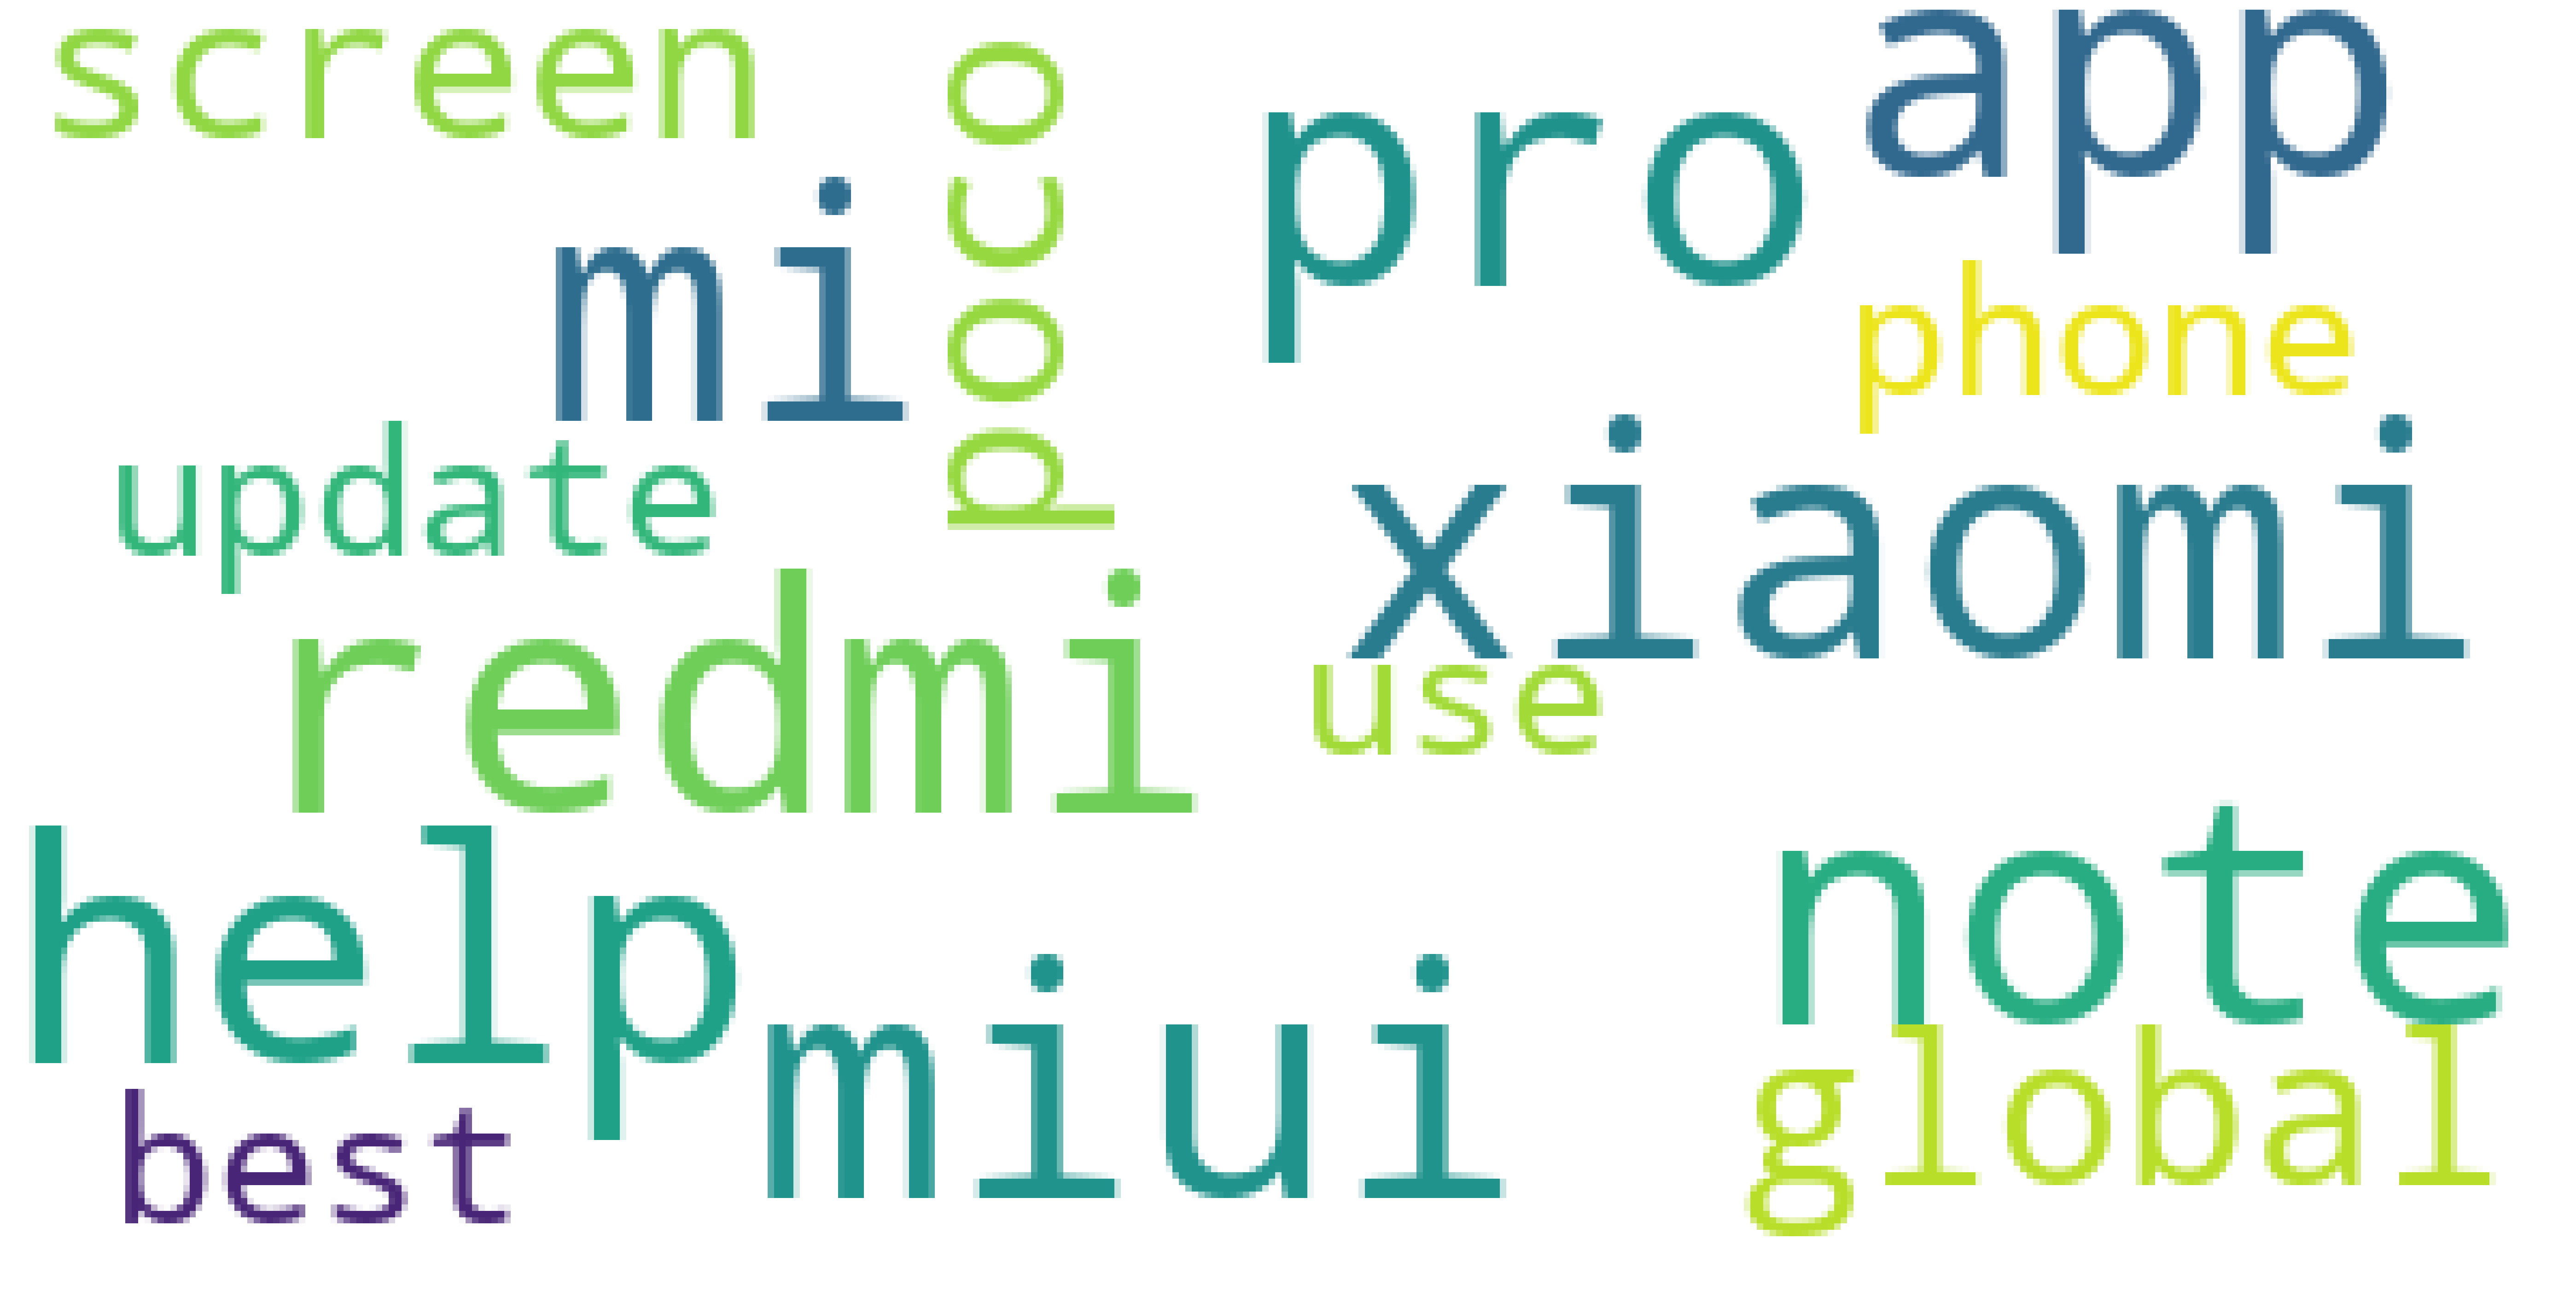

In [29]:
wc(p20,'white','Common Words' )

# Twitter Wordcloud (Positive)

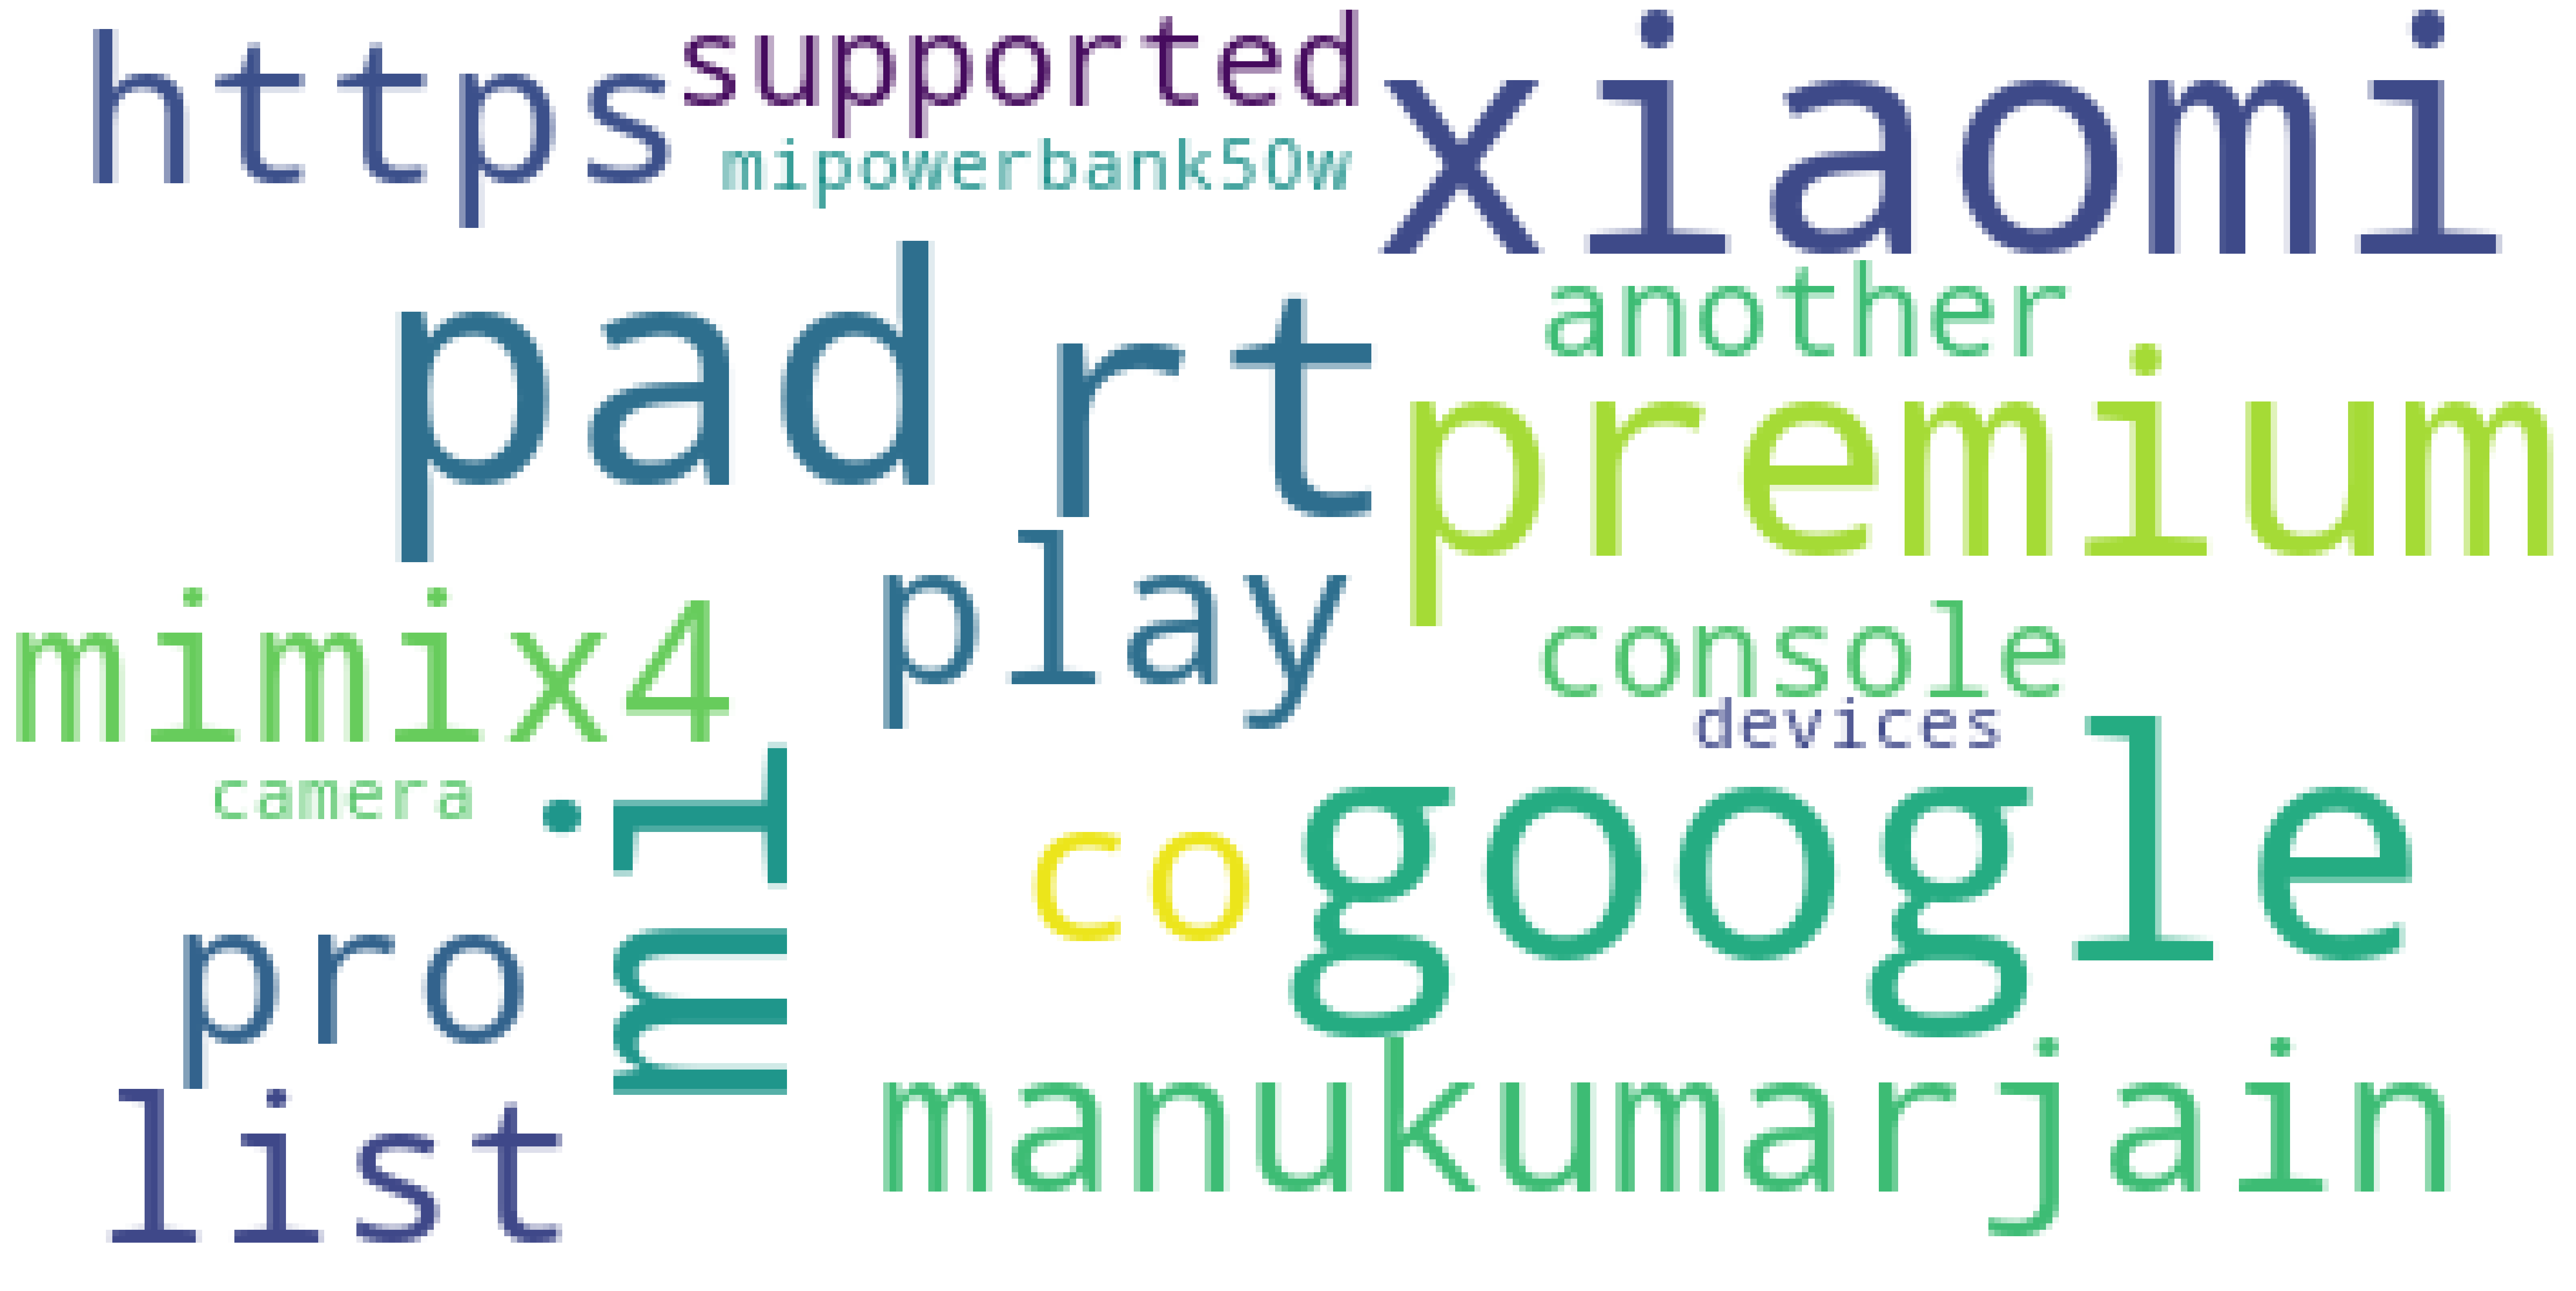

In [30]:
wc(p20tw,'white','Common Words' )

# Reddit

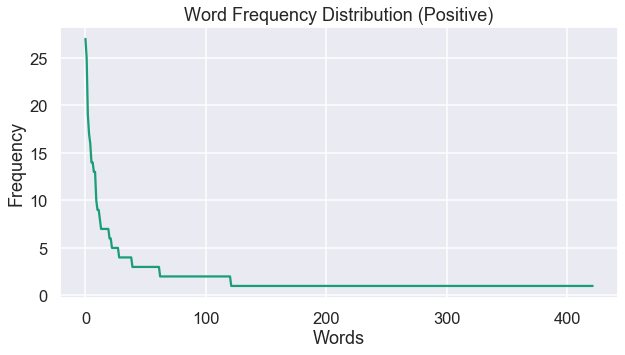

In [31]:
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

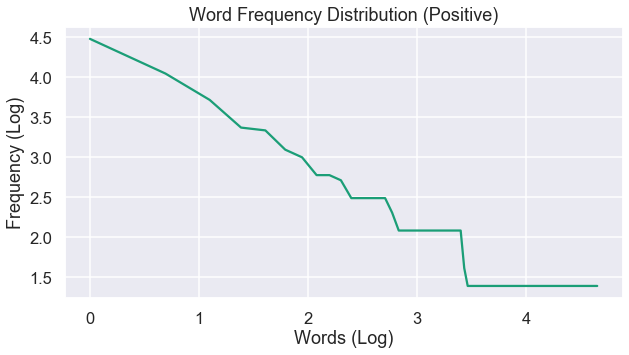

In [32]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))
x_val = [math.log(i + 1) for i in range(len(y_final))]
fig = plt.figure(figsize=(10,5))
plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

# Twitter

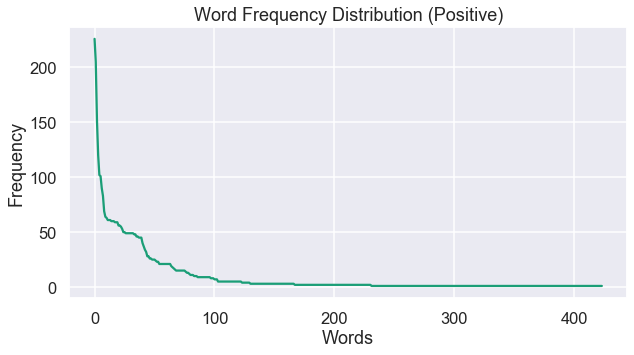

In [33]:
y_valtw = [x[1] for x in pos_freqtw.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_valtw)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

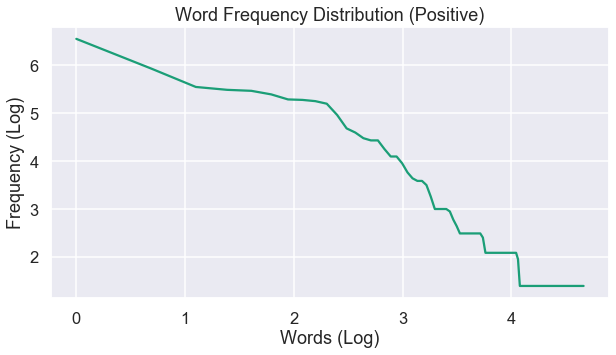

In [34]:
y_finaltw = []
for i, k, z, t in zip(y_valtw[0::4], y_valtw[1::4], y_valtw[2::4], y_valtw[3::4]):
    y_finaltw.append(math.log(i + k + z + t))
x_valtw = [math.log(i + 1) for i in range(len(y_finaltw))]
fig = plt.figure(figsize=(10,5))
plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_valtw, y_finaltw)
plt.show()

# Reddit

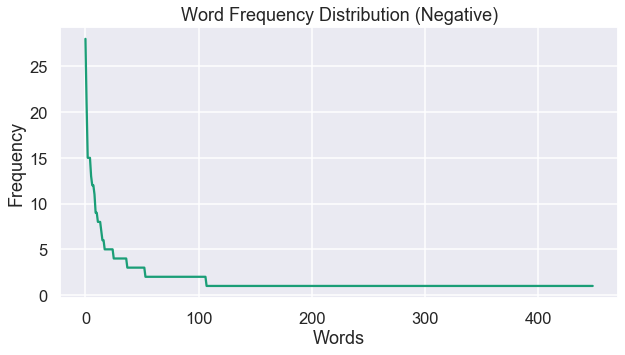

In [35]:
neg_lines = list(df2[df2.label == -1].headline)
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)
negfreq20=neg_freq.most_common(20)
n20=[w[0] for w in negfreq20]
y_val = [x[1] for x in neg_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

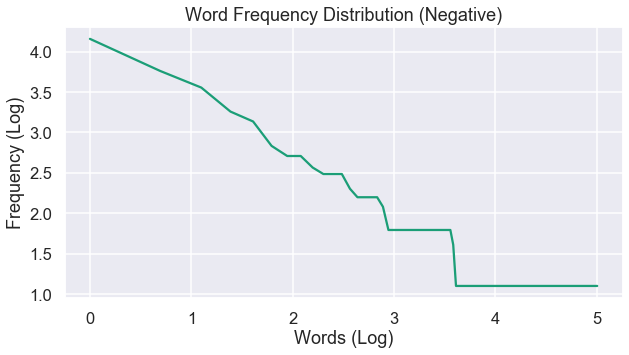

In [36]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))
x_val = [math.log(i+1) for i in range(len(y_final))]
fig = plt.figure(figsize=(10,5))
plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

# Twitter

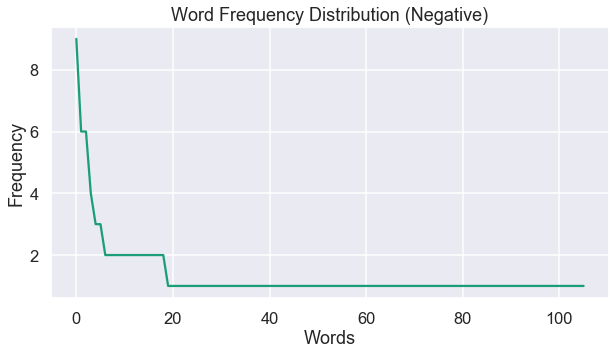

In [37]:
neg_linestw = list(df2tw[df2tw.label == -1].tweet_content)
neg_tokenstw = process_texttw(neg_linestw)
neg_freqtw = nltk.FreqDist(neg_tokenstw)
negfreq20tw=neg_freqtw.most_common(20)
n20tw=[w[0] for w in negfreq20tw]
y_valtw = [x[1] for x in neg_freqtw.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_valtw)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

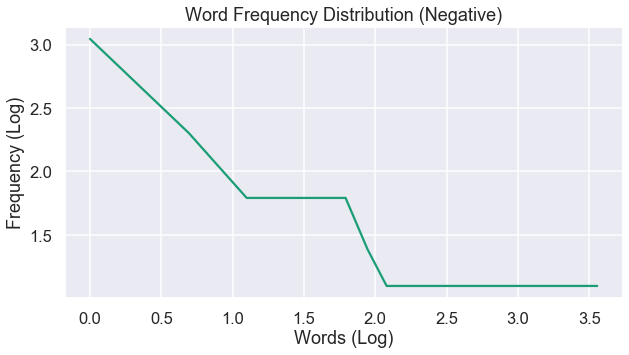

In [38]:
y_finaltw = []
for i, k, z in zip(y_valtw[0::3], y_valtw[1::3], y_valtw[2::3]):
    if i + k + z == 0:
        break
    y_finaltw.append(math.log(i + k + z))
x_valtw = [math.log(i+1) for i in range(len(y_finaltw))]
fig = plt.figure(figsize=(10,5))
plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_valtw, y_finaltw)
plt.show()

# Reddit Wordcloud (Negative)

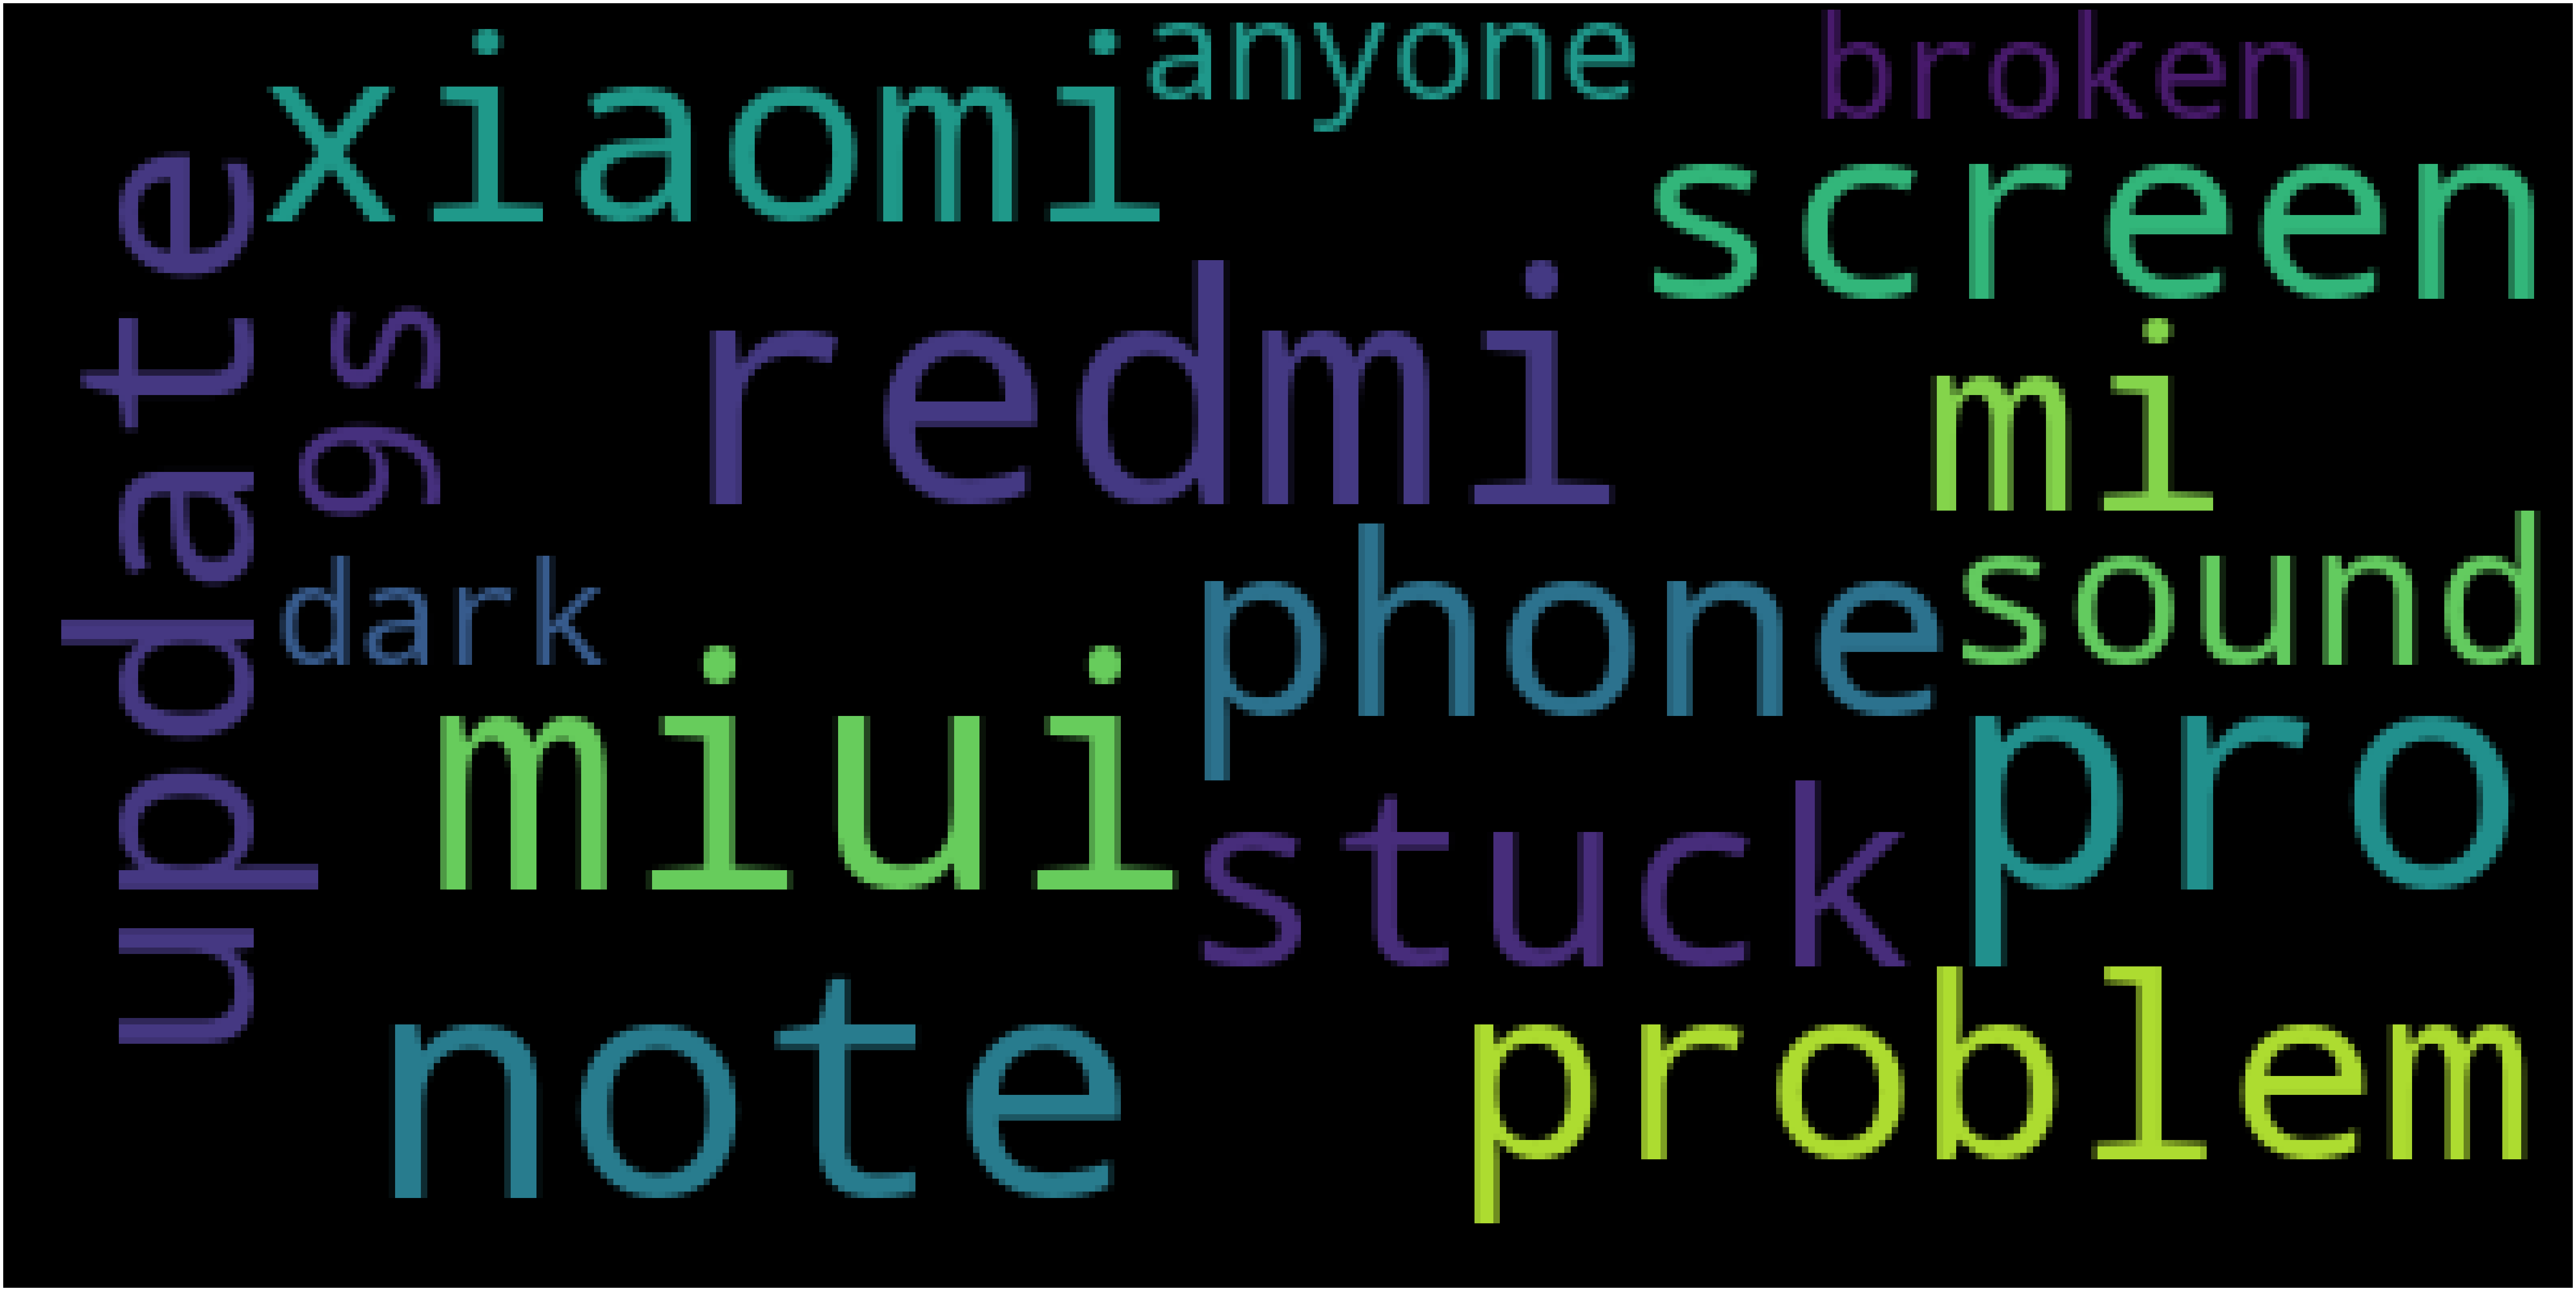

In [39]:
wc(n20,'black','Common Words' )

# Twitter Wordcloud (Negative)

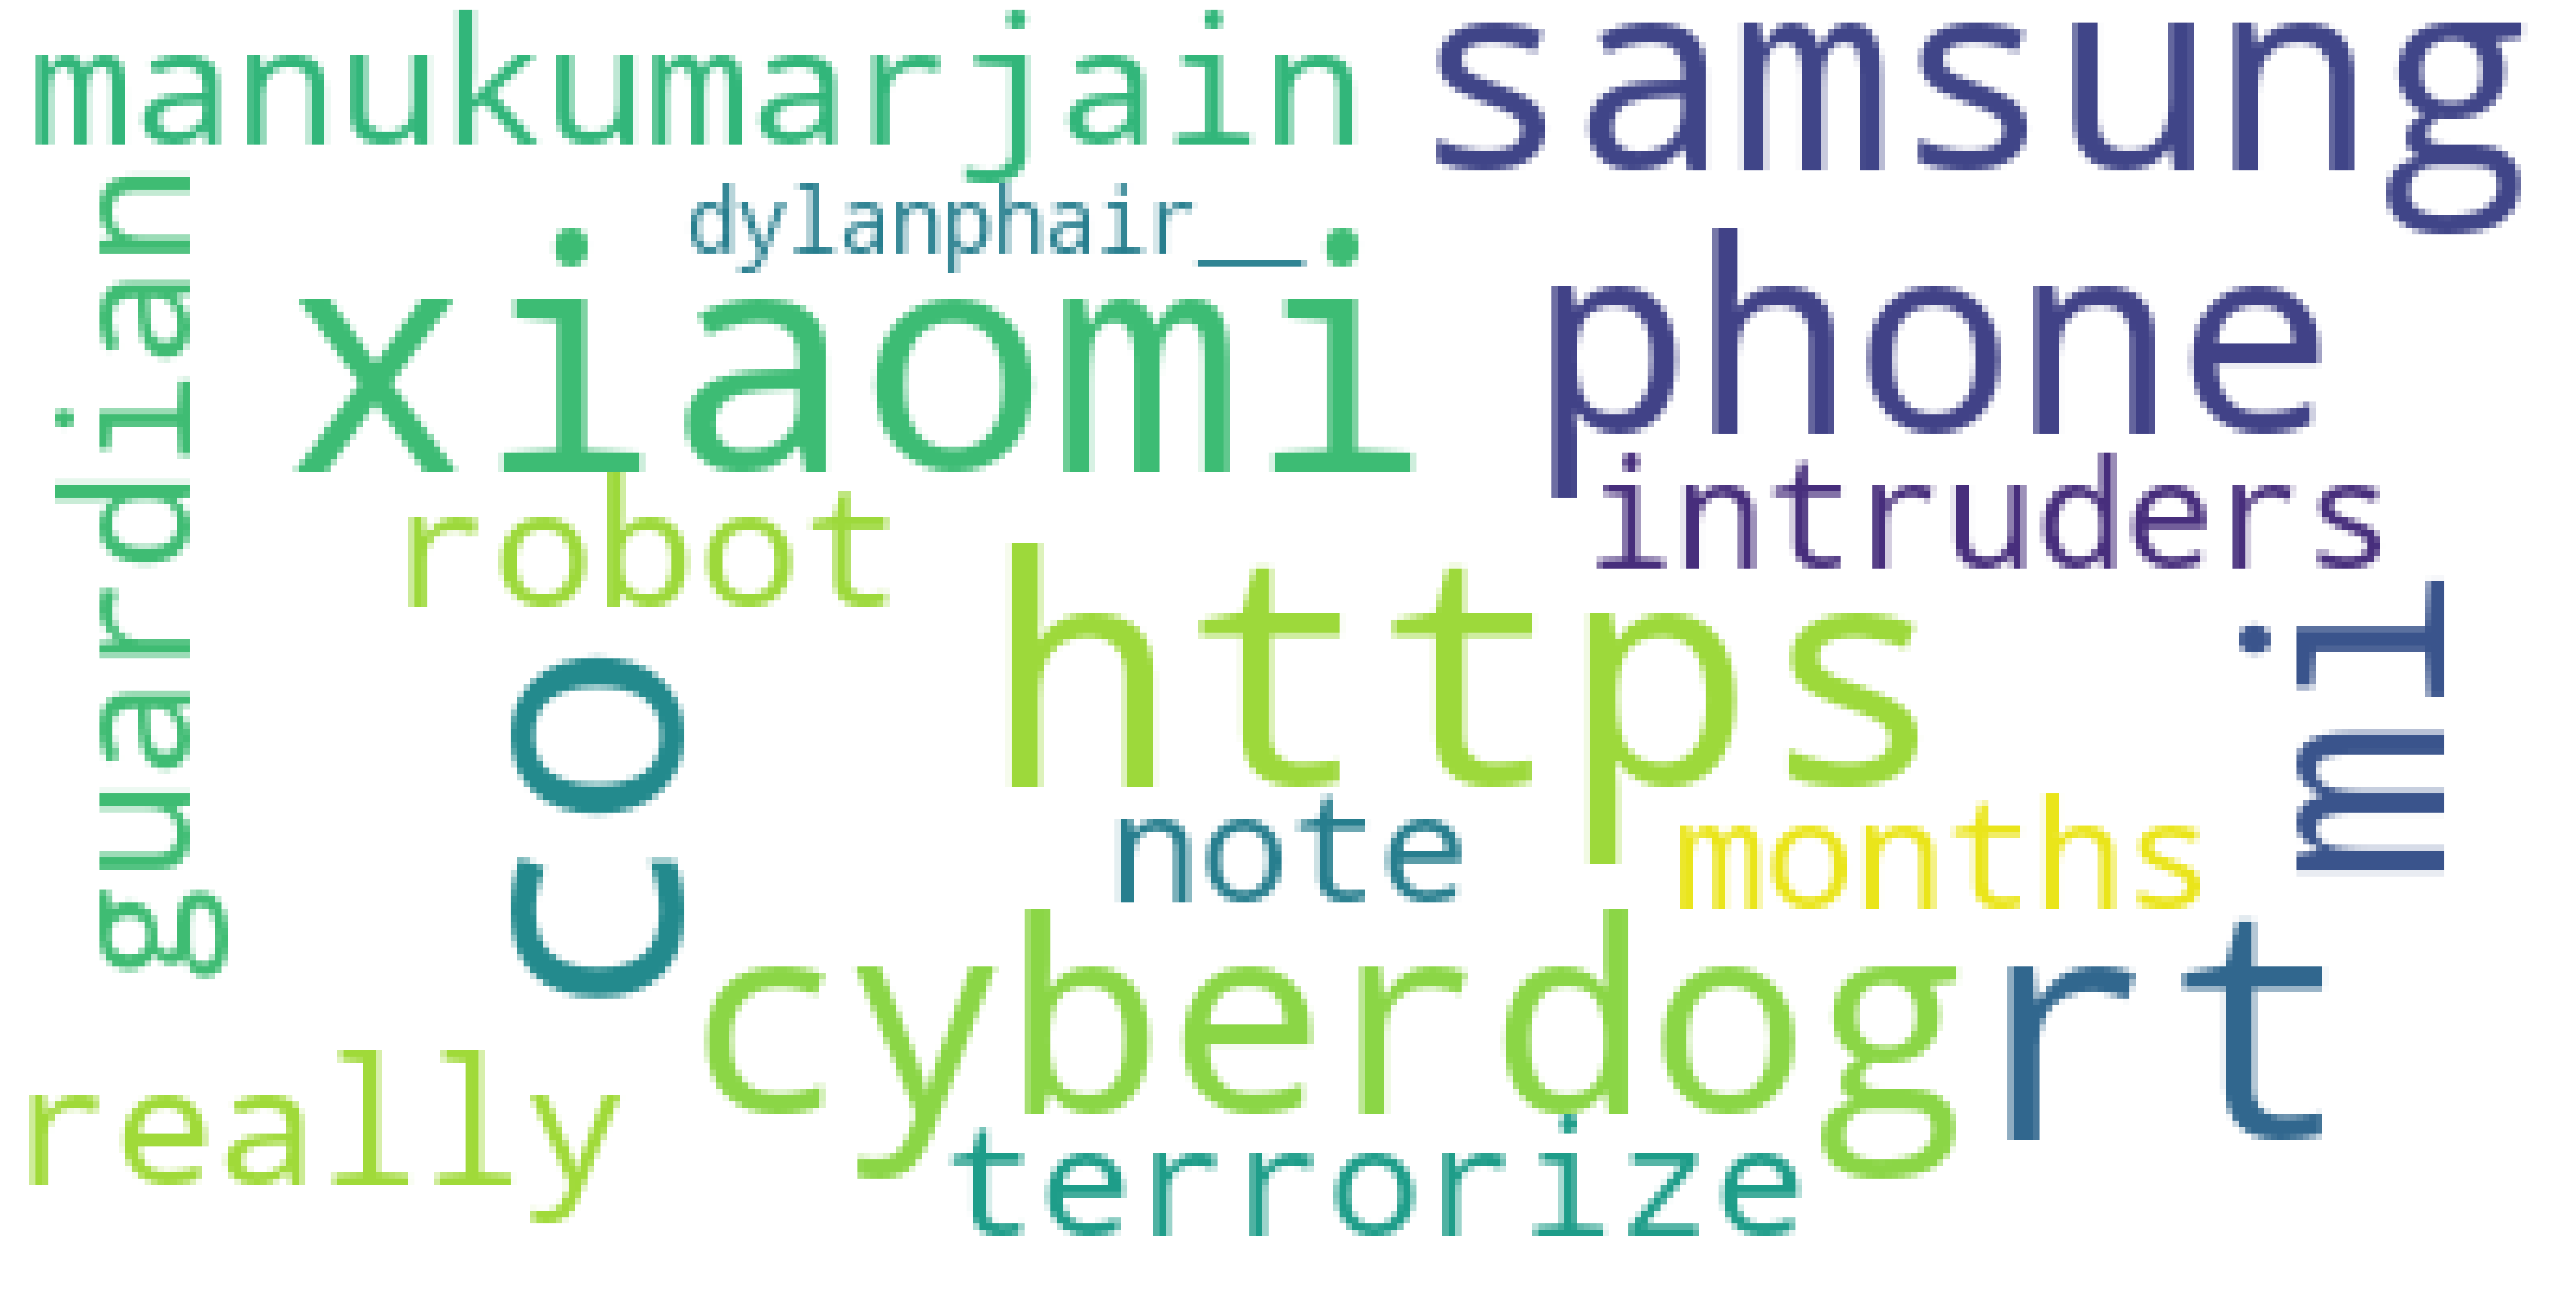

In [40]:
wc(n20tw,'white','Common Words' )